In [ ]:
#import 

In [2]:
#import our libraries 
from bs4 import BeautifulSoup
import csv
import time
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#here we reguest the first website (prenewswire.com) and specifies pages with stock in it 
#after specifing pages with stocks we make 2 lists 
#one for adresses on the news
#and the other is for name of the stock
titles=[]
stocks=[]
for i in range(1):
    news_link = "https://www.prnewswire.com/news-releases/news-releases-list/?page="+str(i)+"&pagesize=25"
    r = requests.get(news_link)
    soup = BeautifulSoup(r.content, "lxml")
    news_pages = soup.findAll("a", class_="news-release")
    new_with_stock=[]
    for page in news_pages:
        req = requests.get("https://www.prnewswire.com"+page["href"])
        parsed_page=BeautifulSoup(req.content,"lxml")
        check_stock=parsed_page.find("a",class_="ticket-symbol")
        if check_stock:
            new_with_stock.append(page)
            title=parsed_page.find("h1").text
            titles.append(title)
            stocks.append(check_stock.text)

print(len(titles))
print(len(stocks))

6
6


## after finishing requesting the first website we get the 2 lists
that mean that for 25 news there is len(titles) has stocks 




## here  we will take the stock name and put it in the finance website 
and get the data of close and volume 
the draw the chart we want 

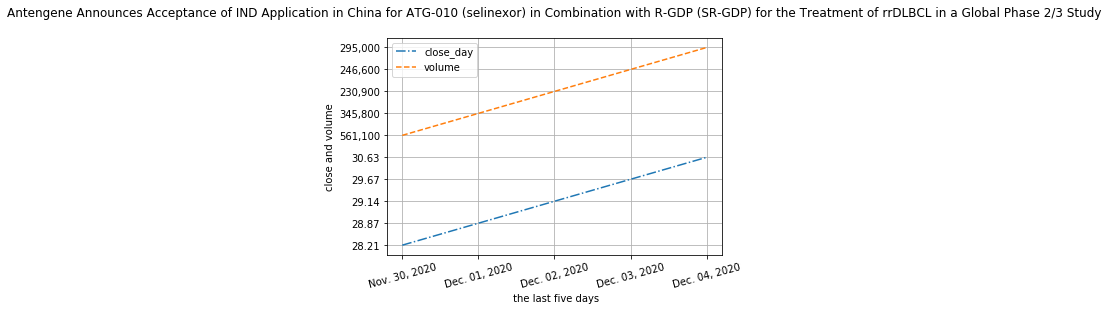

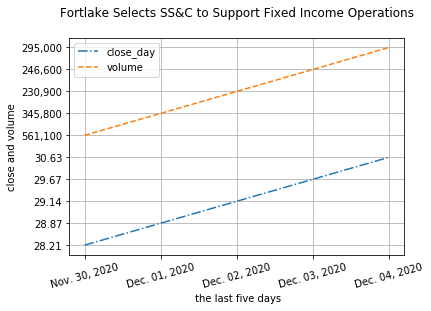

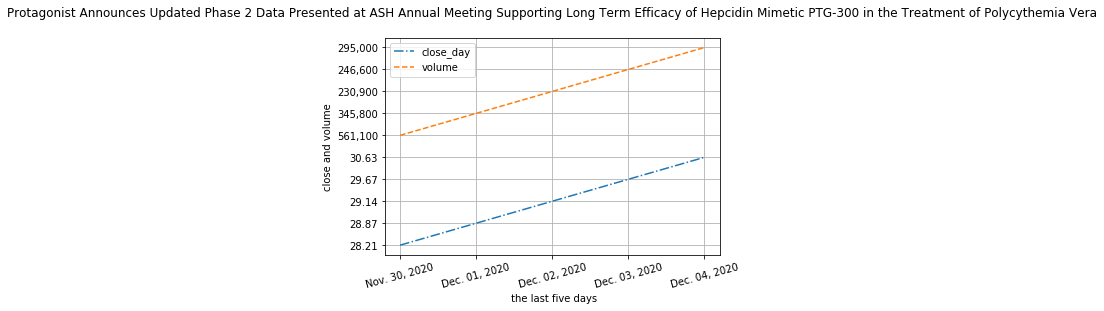

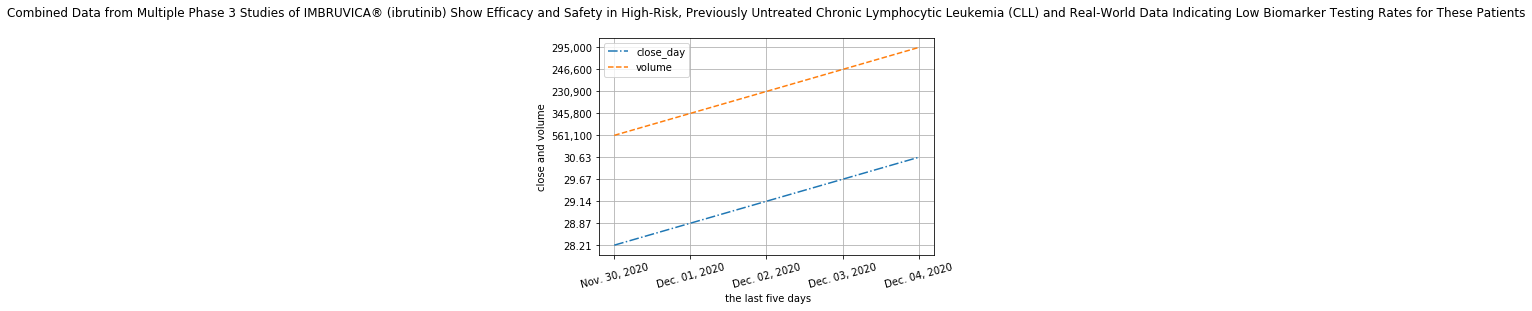

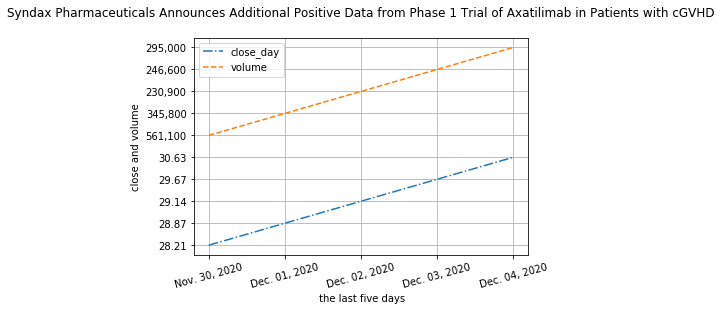

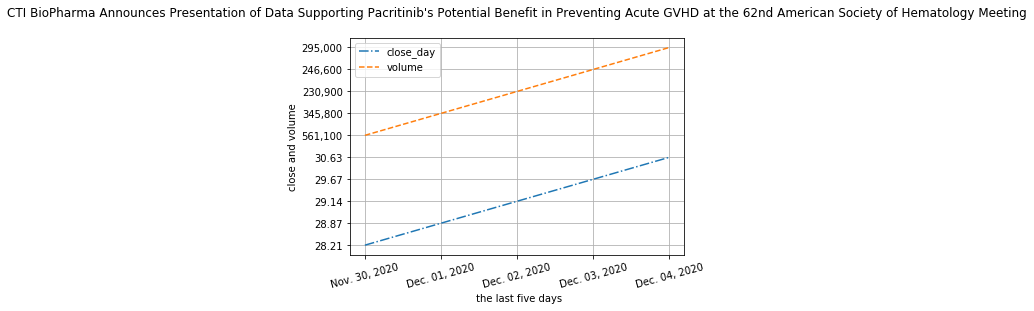

In [12]:
for adress,stock in zip(titles,stocks):
    stock_name = "SMCI"
    r=requests.get("https://ca.finance.yahoo.com/quote/SMCI/history?p=" + stock_name)
    page_text = BeautifulSoup(r.content, "lxml")
    table = page_text.find("table", class_="W(100%) M(0)")
    table_row = table.findAll("tr")
    last_five_days = table_row[1:6]
    # we prepare 3 lists the first for data and
    # the second for close and the third for volume
    dates=[]
    close_data=[]
    volume_data=[]
    for row in last_five_days:
        row_cells = row.findAll("td")
        date = row_cells[0].text
        close = row_cells[4].text
        volume = row_cells[6].text
        dates.append(date)
        close_data.append(close)
        volume_data.append(volume)
    dates=list(reversed(dates))
    close_data=list(reversed(close_data))
    volume_data=list(reversed(volume_data))
    plt.plot(dates,close_data,linestyle='-.',label="close_day")
    plt.plot(dates,volume_data,linestyle='--',label="volume")
    plt.title(adress)
    plt.xlabel(" the last five days")
    plt.ylabel("close and volume")
    plt.grid(True)
    plt.xticks(rotation=15)
    plt.legend(loc='upper left')
    plt.show()